In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 

In [18]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [19]:
X

array([[-4.00433098, -7.86221866],
       [-3.57093383, -7.49851201],
       [ 7.11674101, -6.93027779],
       ...,
       [ 1.77798225,  1.77894678],
       [ 2.59827648,  3.24048537],
       [-0.2045325 , -8.17891859]], shape=(1000, 2))

In [20]:
y

array([1, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1,
       1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 0, 0,
       1, 2, 2, 0, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0,
       2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 2, 2, 1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1,
       0, 1, 2, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2,
       2, 1, 2, 1, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 0, 1, 0,
       0, 2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0,
       2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 0, 2,
       0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0,
       1, 1, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0,
       1, 2, 0, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1,
       2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1,

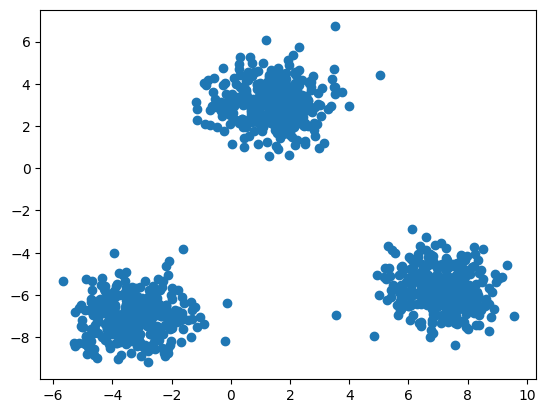

In [21]:
plt.scatter(X[:,0],X[:,1])

In [22]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()

In [15]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
X_train=s.fit_transform(X_train)

In [25]:
X_test=s.transform(X_test)

In [ ]:
from sklearn.cluster import KMeans

In [27]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [28]:
wcss

[1340.0000000000005,
 643.1464526407088,
 63.075411232864205,
 55.577370280812815,
 50.53010774205235,
 40.54060928464351,
 37.37972965723483,
 31.199311973351136,
 27.455904061749628,
 25.361234534004804]

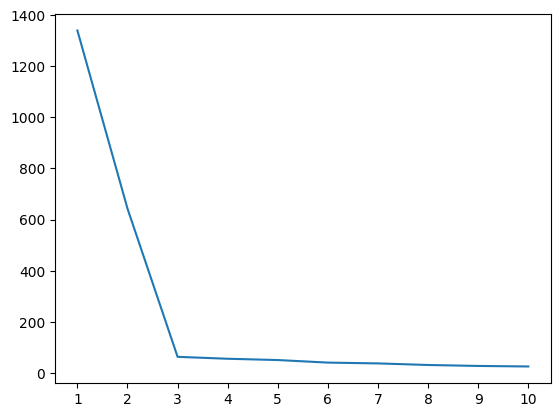

In [34]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.show()

In [41]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [42]:
from kneed import KneeLocator

In [43]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [44]:
kl.elbow

np.int64(3)

In [47]:
from sklearn.metrics import silhouette_score
sc=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    sc.append(score)

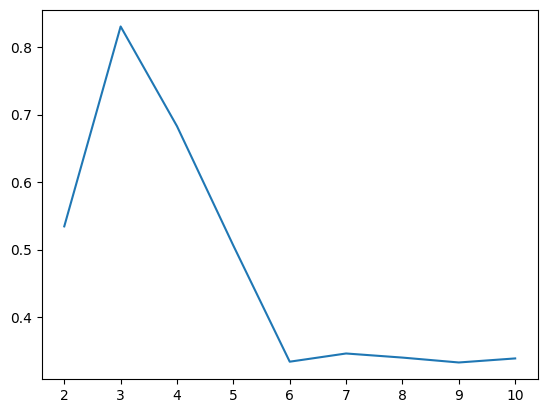

In [48]:
plt.plot(range(2,11),sc)
plt.xticks(range(2,11))
plt.show()